# Data Wrangling Project - Treadmill File Cleaning


## Background

I work(ed) in a neuroscience lab where we get squiggly data.

In brief, we inject viruses into the brains of mice that label target neurons with a fluorescent protein, and then stick a specialized microscope on that shines a specific wavelength of light that lets us visualize these fluorescent neurons. If the neurons flash during the recordings, it means the neuron was firing at that time.

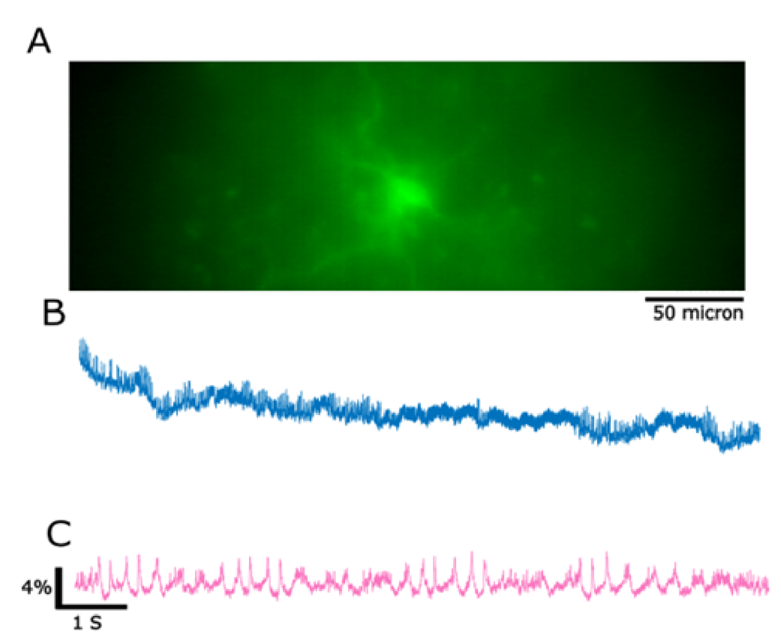

**Goal:** We want to record neural activity while the cute lil' mice run on a treadmill

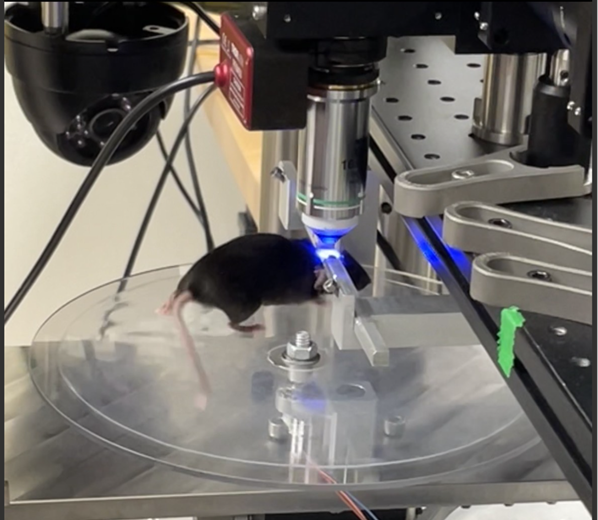

## Problem

The treadmill data that comes out needs to be cleaned before we can do anything with it!


It looks like this:

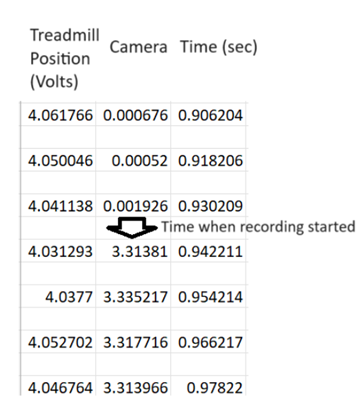

 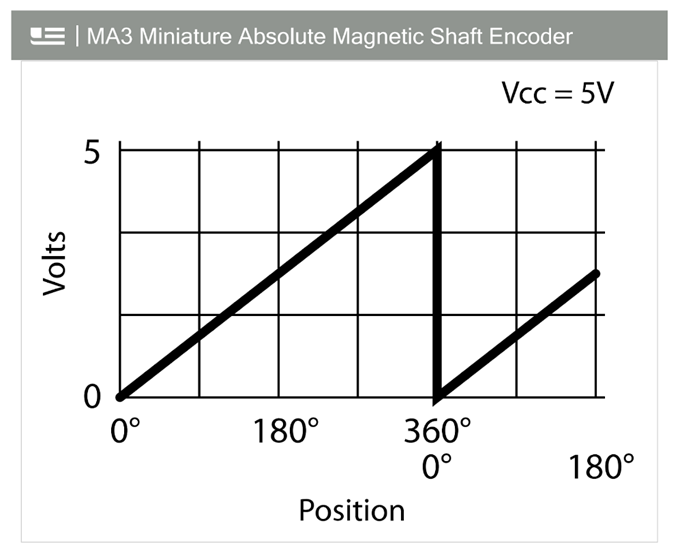 
 
 - **Column 1:** Treadmill position in volts. The treadmill is mounted on an absolute magnetic encoder that reports position in volts, with 1024 positions which correspond to a degree of rotation out of 360°
 
 - **Column 2:** Transitions from ~0 to ~3.3 when it detects the camera has been turned on
 - **Column 3:** Time in Seconds
 

## Code Outline
 - Iterate through all the .xlsx’s in a specific folder. 
     - In each .xlsx:
         - Delete every second row (since these are empty rows)
         - Check the second column of the .xlsx.
             - Only consider rows where the camera was turned on(i.e. the "Camera On/Off" value > 3)
             - Consider the first row as time stamp 0
    - From that point on, all remaining time stamps will be shifted by x seconds, where x is the timestamp where the camera was turned on.
 - Save the .xlsx in a new folder with the exact same file name but appended with the suffix “_cleaned.xlsx”.


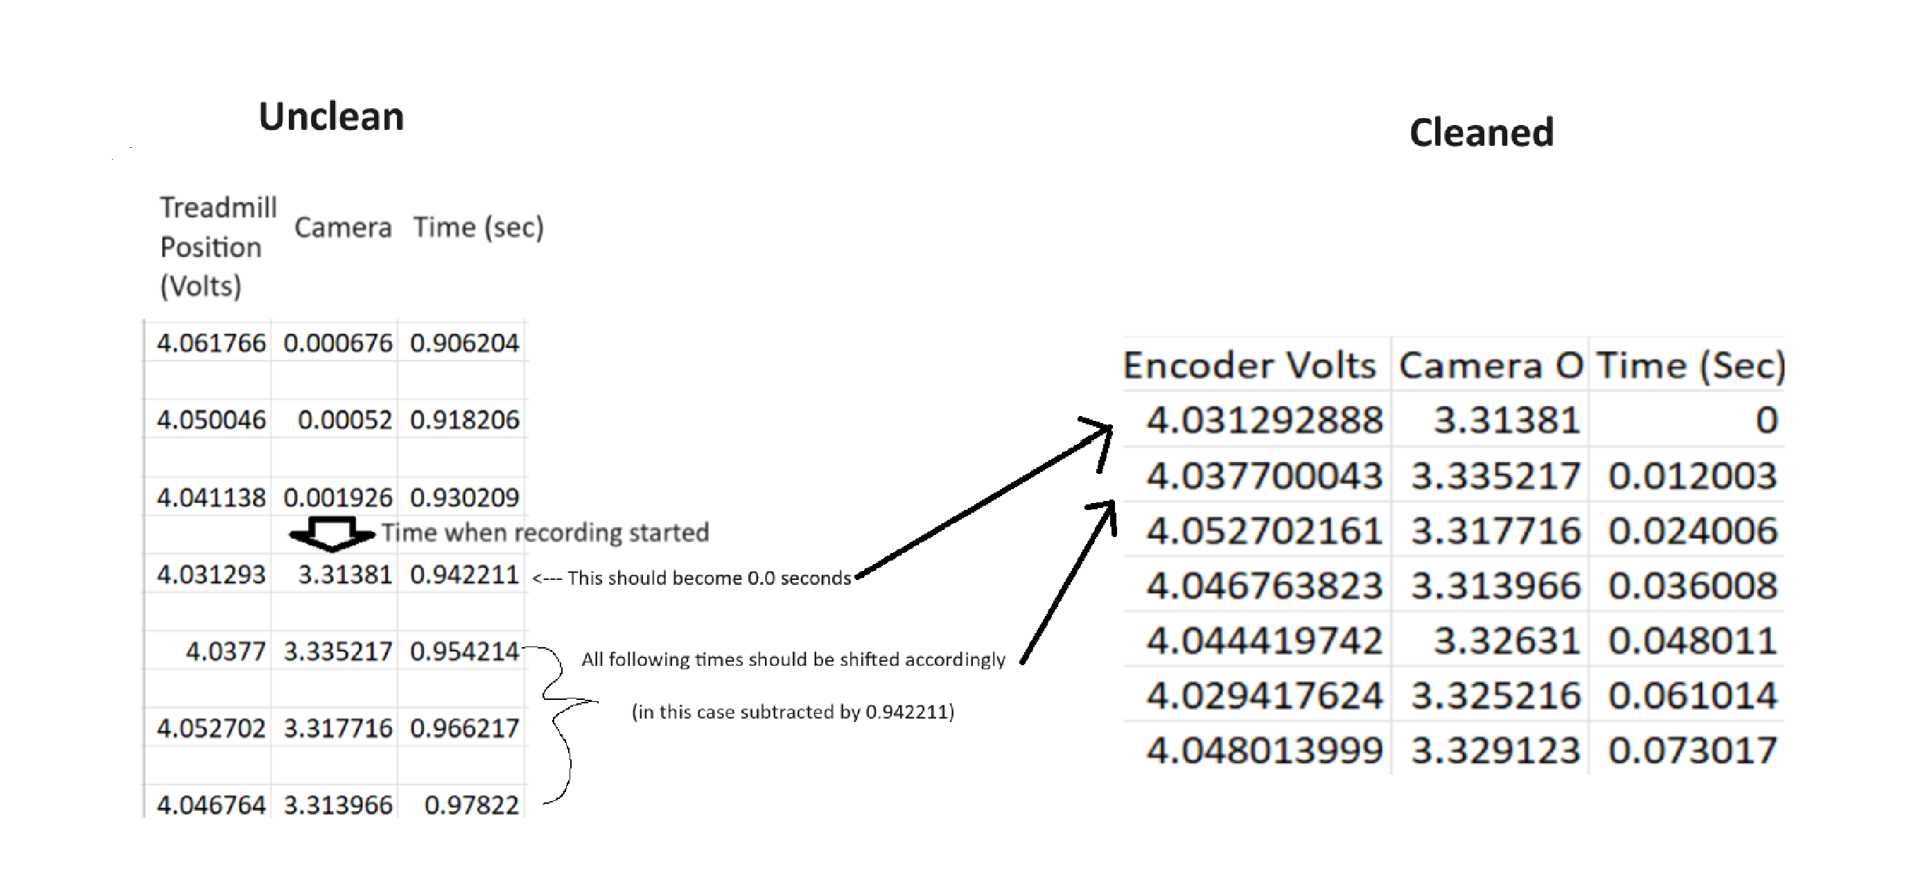

# Code

## Importing the Data

In [1]:
##### Import statements
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
##### Import file

# Defining column names
col_names = ["Treadmill Position (V)", "Camera On/Off", "Time (sec)"]

# Import treadmill data as a pd df, set column names to col_names
treadmill = pd.read_excel(r"C:\Users\sviea\Downloads\Treadmill Files Uncleaned\121523_RC1_Pace_3.xlsx", names = col_names)
treadmill

Treadmill Position (V)  Camera On/Off  Time (sec)
0                         NaN            NaN         NaN
1                    4.495422       0.000051    0.075017
2                         NaN            NaN         NaN
3                    4.549492       0.000989    0.087019
4                         NaN            NaN         NaN
...                       ...            ...         ...
11039                1.790524      -0.000730   66.760291
11040                     NaN            NaN         NaN
11041                1.791461      -0.000105   66.772293
11042                     NaN            NaN         NaN
11043                1.786929       0.002239   66.784296

[11044 rows x 3 columns]

In [3]:
# Drop NaN values
treadmill = treadmill.dropna()
treadmill

Treadmill Position (V)  Camera On/Off  Time (sec)
1                    4.495422       0.000051    0.075017
3                    4.549492       0.000989    0.087019
5                    4.557774      -0.000886    0.099022
7                    4.555430      -0.000261    0.111025
9                    4.540585      -0.000417    0.123028
...                       ...            ...         ...
11035                1.798337       0.000051   66.736285
11037                1.799118       0.002551   66.748288
11039                1.790524      -0.000730   66.760291
11041                1.791461      -0.000105   66.772293
11043                1.786929       0.002239   66.784296

[5522 rows x 3 columns]

In [4]:
# Slice the treadmill df so it only includes values where the camera was turned on (i.e. value > 3)
treadmill = treadmill[treadmill["Camera On/Off"] > 3]
treadmill

Treadmill Position (V)  Camera On/Off  Time (sec)
139                  4.539959       3.327873    0.905207
141                  4.525582       3.321935    0.917209
143                  4.533552       3.331310    0.929212
145                  4.536365       3.315216    0.941215
147                  4.555587       3.318654    0.953218
...                       ...            ...         ...
10069                1.795055       3.326779   60.931256
10071                1.791930       3.327716   60.943259
10073                1.782241       3.321623   60.955261
10075                1.799118       3.323185   60.967265
10077                1.790992       3.319591   60.980267

[4970 rows x 3 columns]

In [5]:
# Just testing that there's no values for the Camera On/Off column where the voltage is less than 3, there aren't
# i.e. our criteria of > 3 is adequate/safe
treadmill_test = treadmill[(treadmill["Camera On/Off"] > 0.1) & (treadmill["Camera On/Off"] <= 3)]
treadmill_test

Empty DataFrame
Columns: [Treadmill Position (V), Camera On/Off, Time (sec)]
Index: []

In [6]:
# Set the first Time (sec) value to 0
time_start = treadmill["Time (sec)"].iloc[0]

# Delete all Time (sec) values by the starting time
treadmill["Time (sec)"] = treadmill["Time (sec)"] - time_start
treadmill

C:\Users\sviea\AppData\Local\Temp\ipykernel_2968\1248695939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treadmill["Time (sec)"] = treadmill["Time (sec)"] - time_start


Treadmill Position (V)  Camera On/Off  Time (sec)
139                  4.539959       3.327873    0.000000
141                  4.525582       3.321935    0.012003
143                  4.533552       3.331310    0.024005
145                  4.536365       3.315216    0.036008
147                  4.555587       3.318654    0.048011
...                       ...            ...         ...
10069                1.795055       3.326779   60.026049
10071                1.791930       3.327716   60.038052
10073                1.782241       3.321623   60.050055
10075                1.799118       3.323185   60.062058
10077                1.790992       3.319591   60.075061

[4970 rows x 3 columns]

## Converting Treadmill Position from Volts to Degrees
It might easier to deal with/conceptualize the treadmill position as degrees instead of volts in the future, either when we need to visualize the data, or convert it into distance over time/speed later on 

In [7]:
# My logic here is that the highest value for Treadmill Position (in Volts) gets designated as 360 degrees, or the end of the circle
circle_360 = treadmill["Treadmill Position (V)"].max() # Set 360 as the max value for Treadmill Position (V) 
one_volt = 360 / circle_360 # One volt is therefore (360 / the max value for Treadmill Position (V)) degrees (e.g., if the max was 5 volts, then 360 / 5 = 72 degrees, or 1 volt = 72 degrees)

# Create a new column that is the Volts * how many degrees one volt is equal to
treadmill["Treadmill Position (degree)"] = treadmill["Treadmill Position (V)"] * one_volt
treadmill

C:\Users\sviea\AppData\Local\Temp\ipykernel_2968\2685856808.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treadmill["Treadmill Position (degree)"] = treadmill["Treadmill Position (V)"] * one_volt


Treadmill Position (V)  Camera On/Off  Time (sec)  \
139                  4.539959       3.327873    0.000000   
141                  4.525582       3.321935    0.012003   
143                  4.533552       3.331310    0.024005   
145                  4.536365       3.315216    0.036008   
147                  4.555587       3.318654    0.048011   
...                       ...            ...         ...   
10069                1.795055       3.326779   60.026049   
10071                1.791930       3.327716   60.038052   
10073                1.782241       3.321623   60.050055   
10075                1.799118       3.323185   60.062058   
10077                1.790992       3.319591   60.075061   

       Treadmill Position (degree)  
139                     320.917423  
141                     319.901146  
143                     320.464517  
145                     320.663353  
147                     322.022072  
...                            ...  
10069                   126.887605  
10071                   126.666679  
10073                   125.981808  
10075                   127.174809  
10077                   126.600401  

[4970 rows x 4 columns]

## Saving the Cleaned Data

In [8]:
##### Save the cleaned treadmill df as an excel file
##### (Saves in a new subfolder within the same folder as the treadmill.xlsx files)

# Name the new folder
new_folder = r"C:\Users\sviea\Downloads\Treadmill Files Uncleaned\Cleaned Treadmill Files"

# Make the new folder
os.makedirs(new_folder, exist_ok=True)

output_file = os.path.join(new_folder, "Cleaned 1.xlsx")

treadmill.to_excel(output_file, index=False)

# Putting it all together
I need to put this all together in one program that scans through every file in a folder and applies the above as a single function.

So first let's turn the file-cleaning-and-saving portion into a function.


In [11]:
##### Making a function to clean a single treadmill.xlsx file
def treadmill_cleaner(file_path, save_location):
    '''
    This function cleans a single treadmill.xlsx file
    And saves it in the save_location folder
    '''
    
    ##### Import File
    col_names = ["Treadmill Position (V)", "Camera On/Off", "Time (sec)"] # Define column names
    treadmill = pd.read_excel(file_path, names = col_names) # Import treadmill data as a pd df, set column names to col_names

    ##### Clean File
    treadmill = treadmill.dropna() # Drop NaN values
    treadmill = treadmill[treadmill["Camera On/Off"] > 3] # Slice the treadmill df so it only includes values where the camera was turned on (i.e. value > 3)
    time_start = treadmill["Time (sec)"].iloc[0] # Set the first Time (sec) value to 0
    treadmill["Time (sec)"] = treadmill["Time (sec)"] - time_start # Delete all Time (sec) values by the starting time
    circle_360 = treadmill["Treadmill Position (V)"].max() # Set 360 as the max value for Treadmill Position (V) 
    one_volt = 360 / circle_360 # One volt is therefore (360 / the max value for Treadmill Position (V)) degrees (e.g., if the max was 5 volts, then 360 / 5 = 72 degrees, or 1 volt = 72 degrees)
    treadmill["Treadmill Position (degree)"] = treadmill["Treadmill Position (V)"] * one_volt
    
    ##### Save Cleaned File
    output_file = os.path.join(save_location, filename) # Generates the name of the output file (save location + file_name)
    base_name, extension = os.path.splitext(output_file) # Separates the file name to be "file_name" and ".xlsx" (modified from ChatGPT)
    cleaned_path = f"{base_name}_cleaned{extension}" # Creates a new file name that is "file_name_cleaned.xlsx" (modified from ChatGPT)
    
    treadmill.to_excel(cleaned_path, index=False) # Saves the file and appends "_cleaned" to the end of it


## Clean a single treadmill file

In [12]:
##### If you want to clean a single file run this code!!!!

filename = "121523_RC1_Pace_1.xlsx" # ____________Change this to what you want the last part of the file name to be!
file_path = r"C:\Users\sviea\Downloads\Treadmill Files Uncleaned\121523_RC1_Pace_1.xlsx" # _______________ Change this to the filepath of the treadmill file you want to clean!
save_location = r"C:\Users\sviea\Downloads\Treadmill Files Uncleaned\Cleaned Treadmill Files" #______________Change this to the name of the folder you want to save in
os.makedirs(save_location, exist_ok=True)  # Makes the save_location as a new folder, skips if it already exists

treadmill_cleaner(file_path, save_location)

## Clean an entire folder containing treadmill files

This program walks through every file in a designated folder and applies the above treadmill_cleaner() function to each file, saving the cleaned file in the same subfolder

In [16]:
#__________________Enter the file path to the folder containing treadmill files here!!!!!_________________________#
directory = r"C:\Users\sviea\Downloads\Treadmill Files Uncleaned"

##### Create the save location as a new folder (if needed)
save_location = f"{directory}" + "\Cleaned Treadmill Files" # Names the save location as the folder containing treadmill files + "\Cleaned Treadmill Files"
os.makedirs(save_location, exist_ok=True)  # Makes the save_location as a new folder, skips if it already exists
print("Save location is:", save_location)

##### Walk through every file in the directory and apply the treadmill_cleaner() function
try: # Made this a try statement so it does not apply to subfolders
    for filename in os.listdir(directory):
        print("File name is:", filename)
        filepath = os.path.join(directory, filename)
        print("File path is:", filepath)
        treadmill_cleaner(filepath, save_location)
except PermissionError:  # Skips subfolders
    print("File is a folder -  skipping")

Save location is: C:\Users\sviea\Downloads\Treadmill Files Uncleaned\Cleaned Treadmill Files
File name is: 121523_RC1_Pace_1.xlsx
File path is: C:\Users\sviea\Downloads\Treadmill Files Uncleaned\121523_RC1_Pace_1.xlsx
File name is: 121523_RC1_Pace_2.xlsx
File path is: C:\Users\sviea\Downloads\Treadmill Files Uncleaned\121523_RC1_Pace_2.xlsx
File name is: 121523_RC1_Pace_3.xlsx
File path is: C:\Users\sviea\Downloads\Treadmill Files Uncleaned\121523_RC1_Pace_3.xlsx
File name is: 121523_RC1_Pace_4.xlsx
File path is: C:\Users\sviea\Downloads\Treadmill Files Uncleaned\121523_RC1_Pace_4.xlsx
File name is: 121523_RC1_Pace_5.xlsx
File path is: C:\Users\sviea\Downloads\Treadmill Files Uncleaned\121523_RC1_Pace_5.xlsx
File name is: 121523_RC1_Pace_6.xlsx
File path is: C:\Users\sviea\Downloads\Treadmill Files Uncleaned\121523_RC1_Pace_6.xlsx
File name is: Cleaned Treadmill Files
File path is: C:\Users\sviea\Downloads\Treadmill Files Uncleaned\Cleaned Treadmill Files
File is a folder -  skipping


# Next Steps


## Visualizing Treadmill Data

Text(0, 0.5, 'Treadmill Position (degrees)')

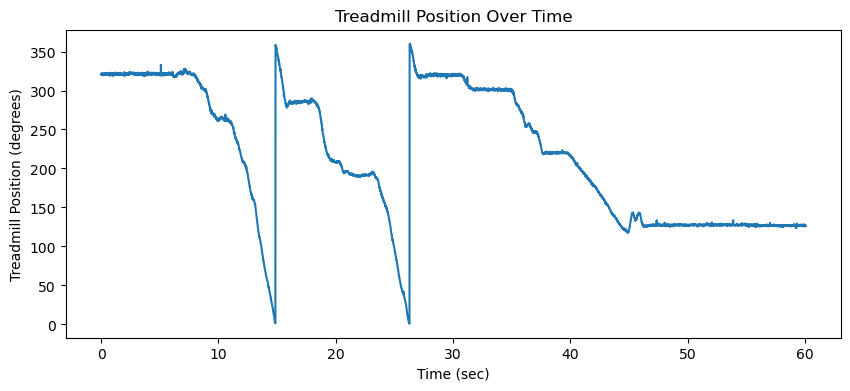

In [17]:
#___________Use this to quickly visualize your treadmill data!_________________
file_name = r"C:\Users\sviea\Downloads\Treadmill Files Uncleaned\Cleaned Treadmill Files\121523_RC1_Pace_3_cleaned.xlsx"
treadmill = pd.read_excel(file_name)

x = treadmill["Time (sec)"]
y = treadmill["Treadmill Position (degree)"]

plt.rcParams['figure.figsize'] = 10, 4
plt.plot(x, y)
plt.title("Treadmill Position Over Time")
plt.xlabel("Time (sec)")
plt.ylabel("Treadmill Position (degrees)")

We have to convert treadmill rotation into distance over time... I don't know how to do this!

But it should look like this:
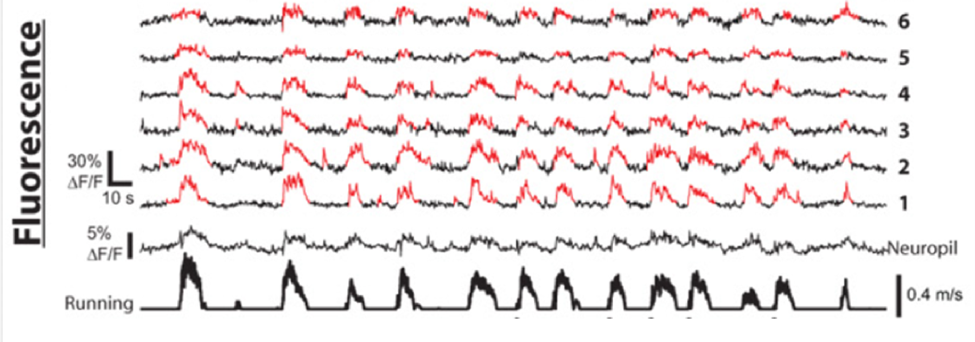